In [ ]:
# 23/02/2023 <---- Started working on
# Author: Pushpraj Katiyar
# email: pk825@snu.edu.in <--- for any query, reach out to this email
# Roll no: 2220120001

# this notebook will solve the foollowing statment:
# 1. Take any image. Apply Gradient of Gaussian using appropriate filter. Then take difference of Gaussian. 
# Repeat this process 3 times, to get 1/8th of the image. Show the result image and the 3 difference images.

# 2. Implement Harris corner detector and apply it on any gray scale image. 
# Choose any 3 threshold values on the f value, and show the effect on the result image.

In [1]:
#import lib
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# getting some upcoming deprication warning due to installed python version. bit of non essencial code
import warnings
warnings.filterwarnings('ignore')

# Take any image. Apply Gradient of Gaussian using appropriate filter. Then take difference of Gaussian.
# Repeat this process 3 times, to get 1/8th of the image. Show the result image and the 3 difference images.

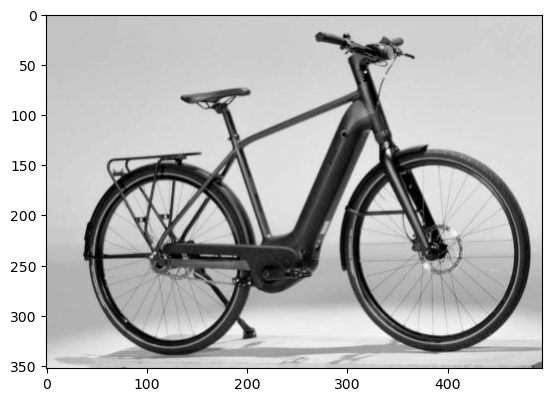

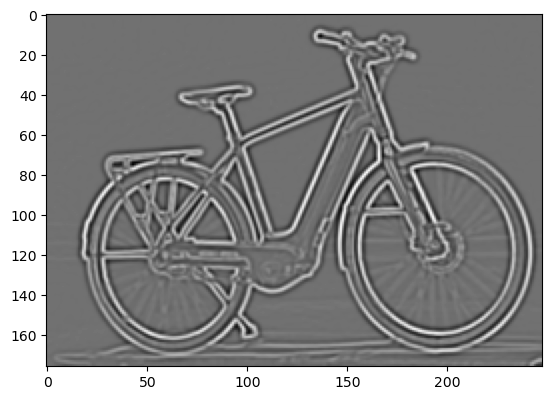

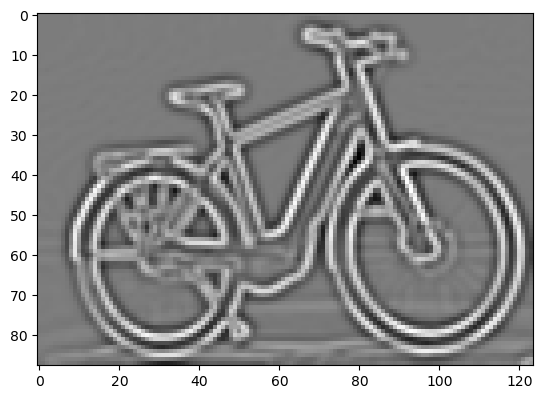

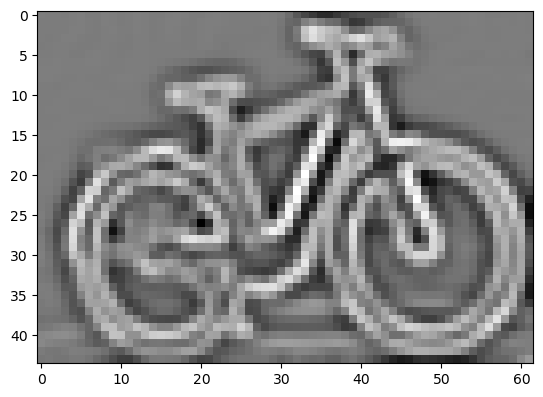

In [22]:
# Load the image
# img = cv2.imread('input/cycle.jpg')

# Load the image
img = cv2.imread("input/cycle.jpg", cv2.IMREAD_GRAYSCALE)

# Define the kernel sizes and sigmas for each step
ksize_1 = (5, 5)
sigma_1 = 1.0
ksize_2 = (9, 9)
sigma_2 = 1.6
ksize_3 = (15, 15)
sigma_3 = 2.5

plt.imshow(img, cmap="gray")
plt.show()

# Apply Gradient of Gaussian and Difference of Gaussian three times
for i in range(3):
    # Apply Gradient of Gaussian
    blurred = cv2.GaussianBlur(img, ksize_1, sigma_1)
    dx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(dx**2 + dy**2)
    # Apply Difference of Gaussian
    dog = cv2.GaussianBlur(magnitude, ksize_2, sigma_2) - cv2.GaussianBlur(magnitude, ksize_3, sigma_3)
#     # Resize image to 1/8th size
    img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    # Resize difference of Gaussian to match image size
    dog = cv2.resize(dog, (img.shape[1], img.shape[0]))

    # Display the result images
    plt.imshow(dog, cmap="gray")
    plt.show()


# 2. Implement Harris corner detector and apply it on any gray scale image. 
# Choose any 3 threshold values on the f value, and show the effect on the result image.

In [25]:
# harris corner detector method equivalent to cv2.cornerHarris()
def harris_corner_detector(gray, threshold_value = 0.001):
    # Compute derivatives in x and y directions using Sobel operator
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Compute products of derivatives at each pixel
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy

    # Compute sums of products of derivatives using a Gaussian window
    ksize = 5
    sigma = 1
    k = 0.04
    gaussian = cv2.getGaussianKernel(ksize, sigma)
    gaussian = np.outer(gaussian, gaussian)
    Sx2 = cv2.filter2D(Ix2, -1, gaussian)
    Sy2 = cv2.filter2D(Iy2, -1, gaussian)
    Sxy = cv2.filter2D(Ixy, -1, gaussian)

    # Compute Harris corner response function
    detM = Sx2 * Sy2 - Sxy * Sxy
    traceM = Sx2 + Sy2
    R = detM - k * traceM * traceM

    # Apply non-maximum suppression to local maxima in R
    threshold = threshold_value * np.max(R)
    kernel_size = 3
    R_max = cv2.dilate(R, np.ones((kernel_size,kernel_size)))
    corner_mask = np.zeros_like(R)
    corner_mask[R > threshold] = 1
    corner_mask = corner_mask * (R == R_max)

    # Return coordinates of corners
    corners = np.argwhere(corner_mask == 1)
    corners = corners[:,::-1]

    return corners

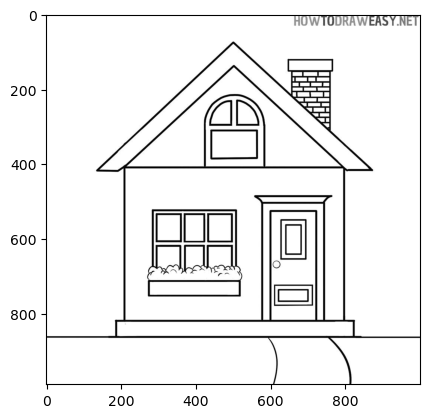

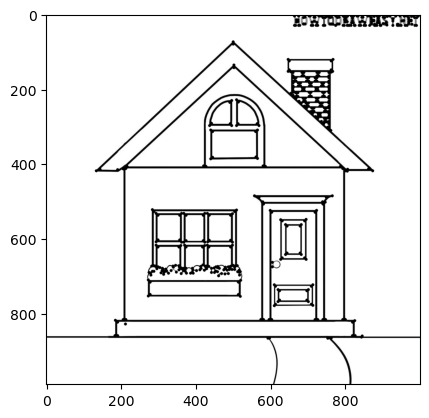

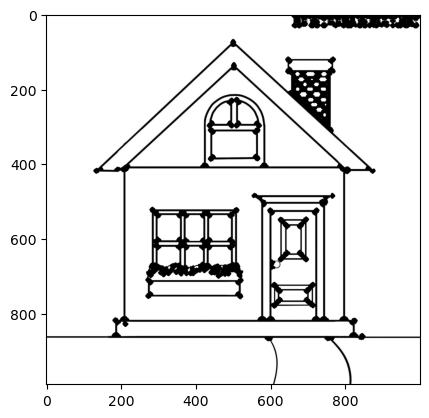

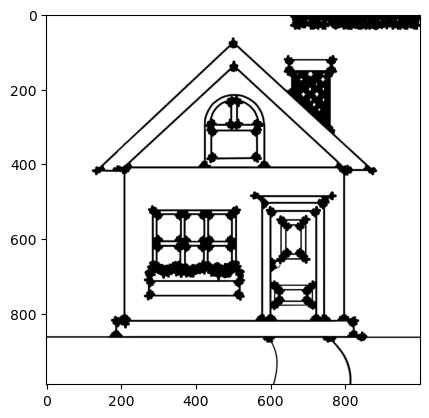

In [28]:
# Load the image
img = cv2.imread("input/house.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()
# Detect corners using Harris corner detector
threshold_values = [0.001, 0.005, 0.01]
for i in range(3):
    corners = harris_corner_detector(img, threshold_values[i])
    # Draw detected corners on original image
    for corner in corners:
        cv2.circle(img, tuple(corner), 4, (0, 0, 255), -1)

     # Display the result images
    plt.imshow(img, cmap="gray")
    plt.show()

# Assignment completed